In [33]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#variable df
df = pd.read_csv('train.csv')

In [34]:
df.shape
df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
#regresa los valores unico de cada variable
df.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [41]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [15]:
#Re-Classify 
def clean_pclass(row):
    if row.Pclass == 1:
        return 'Alta'
    elif row.Pclass == 2:
        return 'Media'
    elif row.Pclass == 3:
        return 'Baja'
    return row.Pclass

def clean_df(df):
    df_cleaned = df.copy()
    df_cleaned['Pclass'] = df_cleaned.apply(lambda row: clean_pclass(row), axis=1)
    return df_cleaned

df_cleaned = clean_df(df)
print("Valores unicos en 'Pclass' después de la limpieza:\n", df_cleaned['Pclass'].unique())

Valores unicos en 'Pclass' después de la limpieza:
 ['Baja' 'Alta' 'Media']


In [43]:
#llama la funcion clean_df de la columna Pclass
def clean_df(playlist):
    df_cleaned = df.copy()
    return df_cleaned
df_cleaned = clean_df(df)
print(df_cleaned.Ticket.unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [45]:
# Limpiar el DataFrame y luego eliminar columnas específicas
df_cleaned = clean_df(df)
df_cleaned = df_cleaned.drop(columns=['Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'])

# Filtrar filas con valores NaN
df_cleaned = df_cleaned.dropna(axis=0)

In [47]:
#imprimir para ver si se elimino la columna Ticket
print(df_cleaned)

     PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
885          886         0               Rice, Mrs. William (Margaret Norton)   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

        Sex   Age Embarked 

In [48]:
print(df_cleaned.describe())

       PassengerId    Survived         Age
count   712.000000  712.000000  712.000000
mean    448.589888    0.404494   29.642093
std     258.683191    0.491139   14.492933
min       1.000000    0.000000    0.420000
25%     222.750000    0.000000   20.000000
50%     445.000000    0.000000   28.000000
75%     677.250000    1.000000   38.000000
max     891.000000    1.000000   80.000000


In [49]:
#vemos como queda despues del drop
print(df_cleaned.describe())

       PassengerId    Survived         Age
count   712.000000  712.000000  712.000000
mean    448.589888    0.404494   29.642093
std     258.683191    0.491139   14.492933
min       1.000000    0.000000    0.420000
25%     222.750000    0.000000   20.000000
50%     445.000000    0.000000   28.000000
75%     677.250000    1.000000   38.000000
max     891.000000    1.000000   80.000000


In [50]:
#busca todos los valores NaN en todas las columnas con un 40%
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4):
#only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'Embarked'], dtype='object')

In [51]:
#con eesto se limpiaran las filas con valores NaN
df_cleaned = df_cleaned.dropna(axis=0)
#checamos como quedaron los datos
df_cleaned.shape

(712, 6)

In [53]:
#ponemos rangos y observamos la descripcion
df_cleaned = df_cleaned[df_cleaned['Age'] <20]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Survived,Age
count,164.000000,164.000000,164.000000
mean,436.945122,0.481707,11.979695
std,276.366771,0.501196,6.656828
min,8.000000,0.000000,0.420000
25%,183.750000,0.000000,5.000000
50%,422.500000,0.000000,15.000000
75%,694.250000,1.000000,18.000000
max,888.000000,1.000000,19.000000


<Axes: >

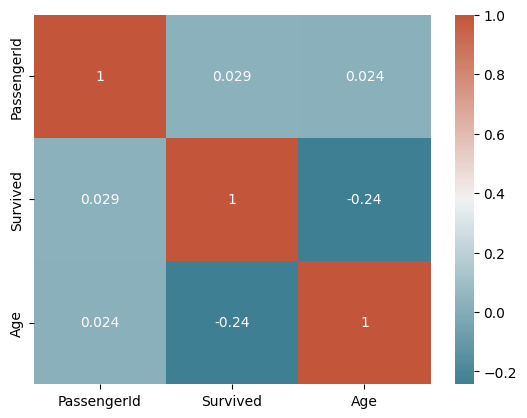

In [54]:
#calculamos matriz
df_cleaned_numeric = df_cleaned.select_dtypes(include=[float, int])
corr = df_cleaned_numeric.corr()
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, 
annot=True,
cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: xlabel='Age', ylabel='Sex'>

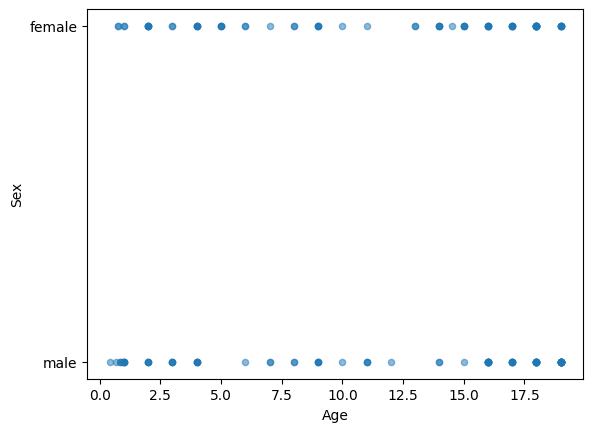

In [56]:
#graficas de dispesion entre dos variables
df_cleaned.plot(kind='scatter', x='Age', y='Sex', alpha=0.5)

C:\Users\Krato\AppData\Local\Temp\ipykernel_17164\3421680233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sex'] = df_cleaned['Sex'].astype('category').cat.codes  # Convertir 'Sex' en valores numéricos


<Axes: xlabel='Age', ylabel='Sex'>

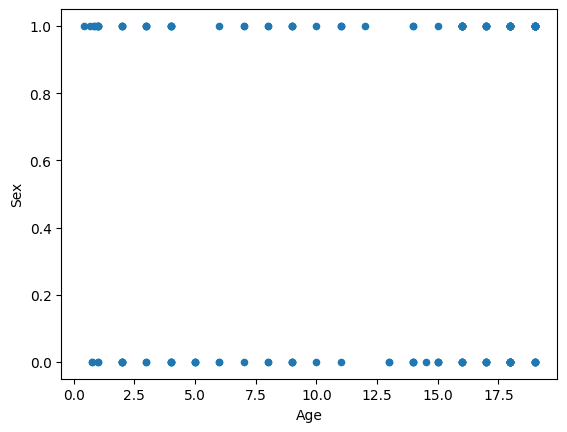

In [64]:
df_cleaned['Sex'] = df_cleaned['Sex'].astype('category').cat.codes  # Convertir 'Sex' en valores numéricos
df_cleaned.plot(kind='scatter', x='Age', y='Sex')

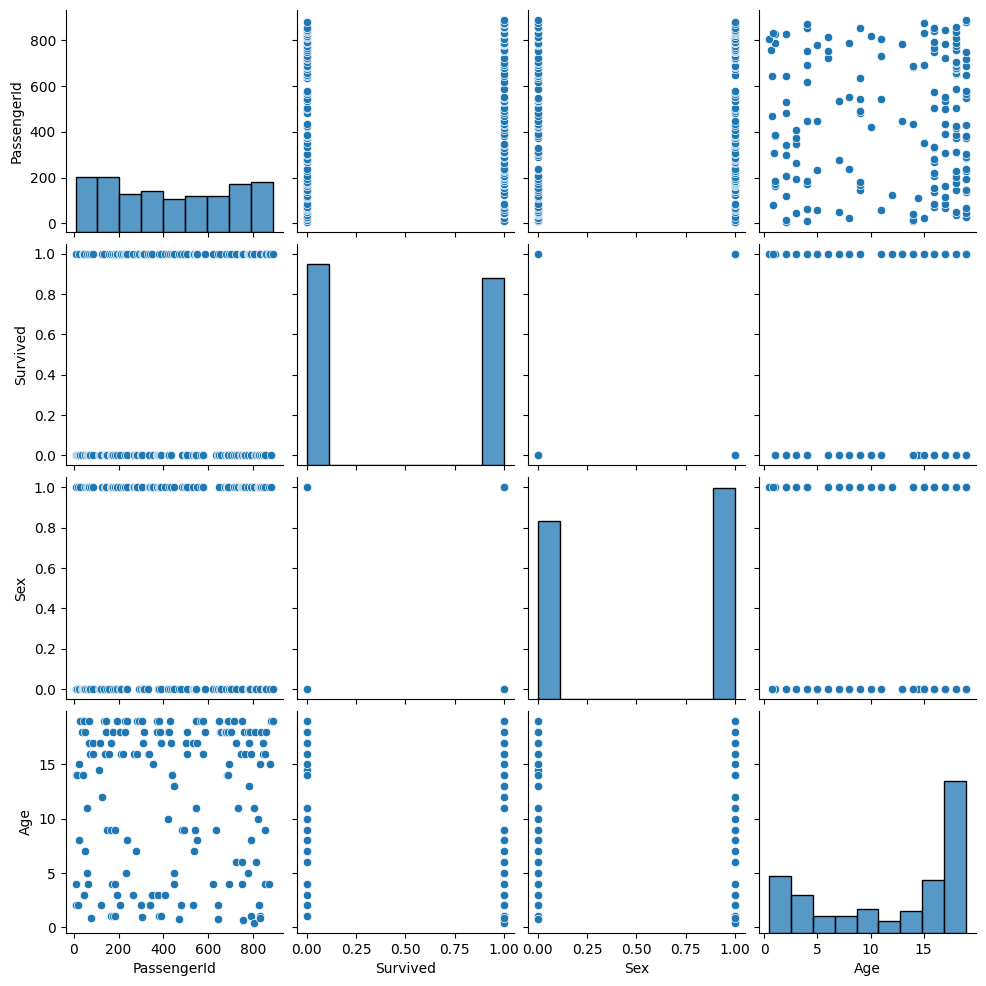

In [65]:
#graficas de todas nuestras variables
sns.pairplot(df_cleaned)

<Axes: ylabel='Frequency'>

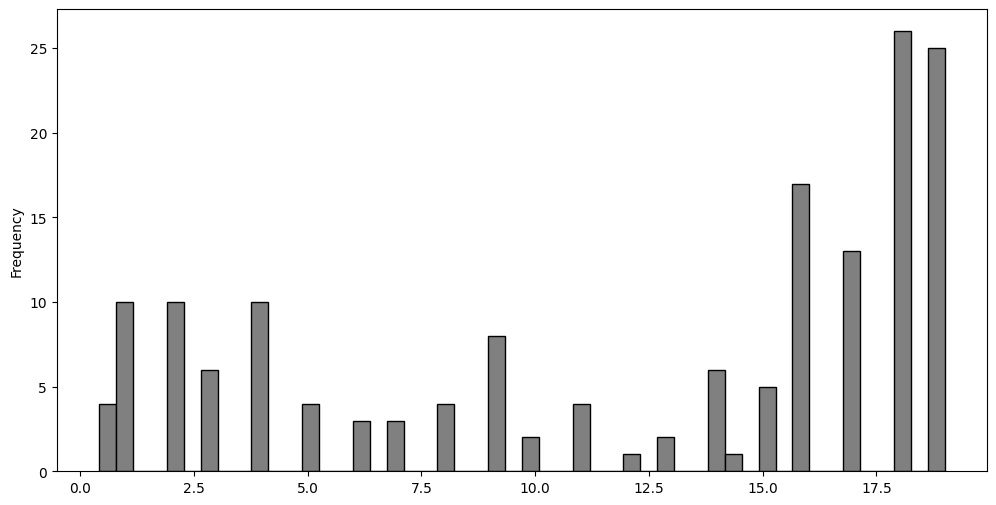

In [67]:
#histograma
df_cleaned['Age'].plot(kind='hist', bins=50, figsize=(12,6),facecolor='grey',edgecolor='black')

<Axes: ylabel='Frequency'>

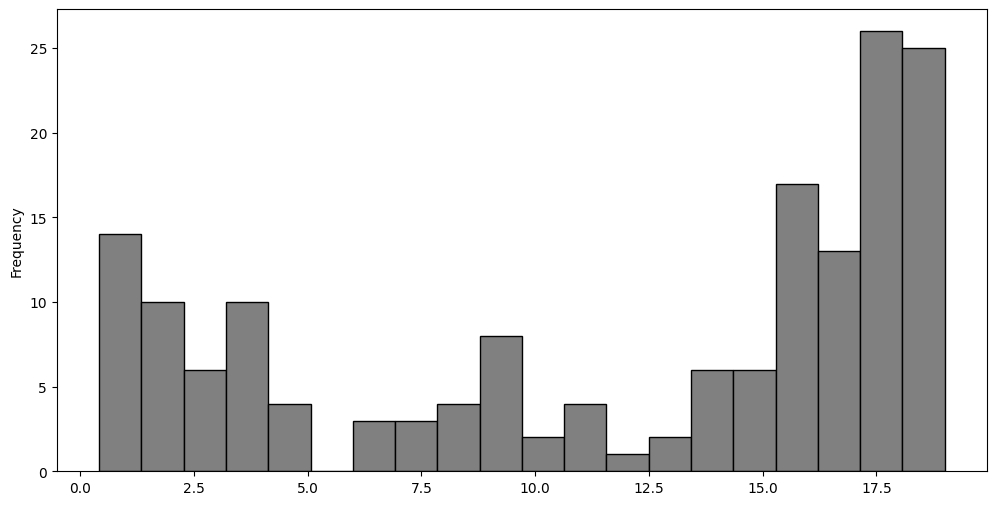

In [68]:
df_cleaned['Age'].plot(kind='hist', bins=20, figsize=(12,6),facecolor='grey',edgecolor='black')

<Axes: title={'center': 'Survived'}, xlabel='Age'>

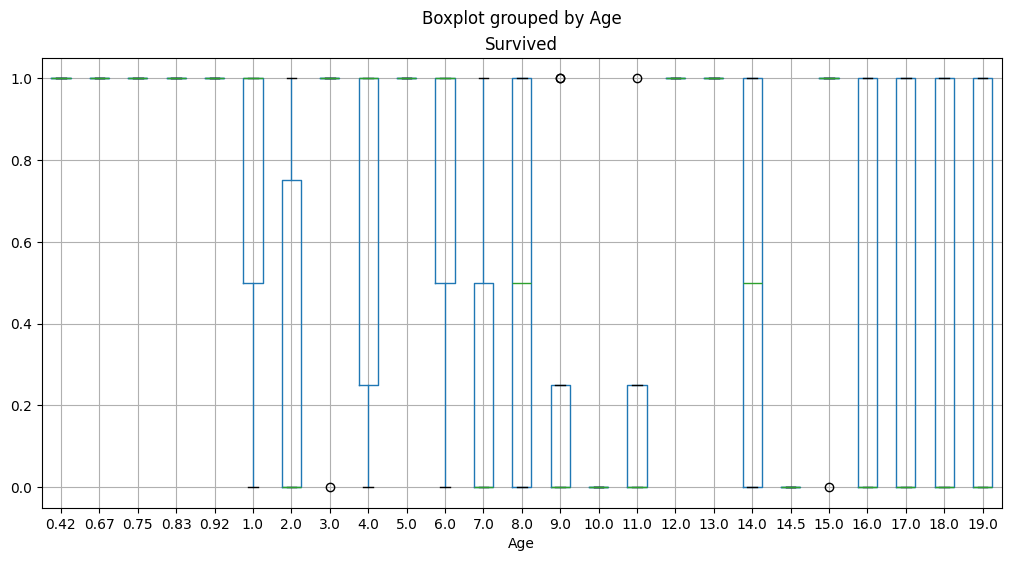

In [73]:
#grafica de bloques
df_cleaned.boxplot('Survived', by='Age', figsize=(12, 6))